In [11]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import cifar10

In [12]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [13]:
x_train,x_test = x_train/255.0,x_test/255.0

In [14]:
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

In [15]:
print("Training samples:", x_train.shape)
print("Test samples:", x_test.shape)

Training samples: (50000, 32, 32, 3)
Test samples: (10000, 32, 32, 3)


In [16]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])


In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 92ms/step - accuracy: 0.3039 - loss: 1.8606 - val_accuracy: 0.4993 - val_loss: 1.3952
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 89ms/step - accuracy: 0.5163 - loss: 1.3447 - val_accuracy: 0.5682 - val_loss: 1.2426
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.5845 - loss: 1.1759 - val_accuracy: 0.6214 - val_loss: 1.0885
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.6233 - loss: 1.0663 - val_accuracy: 0.6305 - val_loss: 1.0595
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.6498 - loss: 0.9875 - val_accuracy: 0.6498 - val_loss: 1.0061
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 89ms/step - accuracy: 0.6761 - loss: 0.9222 - val_accuracy: 0.6601 - val_loss: 0.9706
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.6963 - loss: 0.8726 - val_accuracy: 0.6724 - val_loss: 0.9526
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.7140 - loss: 0.8155 - 

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6914 - loss: 0.9256
Test Accuracy: 0.6851999759674072


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Predicted class: automobile


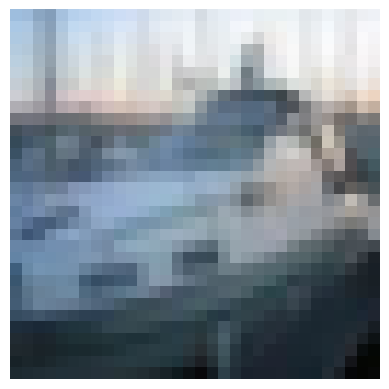

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Pick one test image
img = x_test[2]
plt.imshow(img)
plt.axis("off")

# Prepare for prediction
img_array = np.expand_dims(img, axis=0)

prediction = model.predict(img_array)
class_id = np.argmax(prediction)

print("Predicted class:", class_names[class_id])
